<a href="https://colab.research.google.com/github/AldataSci/Data602FinalProject/blob/main/NYC_(causes_of_deaths).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
For my final project I have conducted an analysis of the leading causes of Death in New York City. My research question revolved around looking at the leading statistics of deaths among ethnicities,the death rate among ethnicites and most importantly the leading cause of death. This data was provided by the New York City Open Data and was published by the Department of Health and Mental Hygiene. 
The link is here https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/AldataSci/Data602FinalProject/main/New_York_City_Leading_Causes_of_Death.csv")
df

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2019,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Male,Hispanic,1603,136.8029917,176.783287
1,2019,Malignant Neoplasms (Cancer: C00-C97),Male,Hispanic,1164,99.3379179,121.5817693
2,2019,Mental and Behavioral Disorders due to Acciden...,Male,Hispanic,423,36.09960418,35.70789583
3,2019,Diabetes Mellitus (E10-E14),Male,Hispanic,245,20.9087542,25.40934387
4,2019,Influenza (Flu) and Pneumonia (J09-J18),Male,Hispanic,182,15.5322174,19.85821025
...,...,...,...,...,...,...,...
1267,2008,Influenza (Flu) and Pneumonia (J09-J18),M,Not Stated/Unknown,11,.,.
1268,2007,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Not Stated/Unknown,86,.,.
1269,2008,Malignant Neoplasms (Cancer: C00-C97),M,Black Non-Hispanic,1464,172.4,220.4
1270,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     1272 non-null   int64 
 1   Leading Cause            1272 non-null   object
 2   Sex                      1272 non-null   object
 3   Race Ethnicity           1272 non-null   object
 4   Deaths                   1272 non-null   object
 5   Death Rate               1205 non-null   object
 6   Age Adjusted Death Rate  1205 non-null   object
dtypes: int64(1), object(6)
memory usage: 69.7+ KB


In [ ]:
## There are 34 unique causes of deaths if i delted the empty data set but now I can see there is actually 34 leading causes: 
df["Leading Cause"].unique()

array(['Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Diabetes Mellitus (E10-E14)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Chronic Liver Disease and Cirrhosis (K70, K73-K74)',
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Essential Hypertension and Renal Diseases (I10, I12)',
       'All Other Causes',
       'Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)',
       "Alzheimer's Disease (G30)",
       'Assault (Homicide: U01-U02, Y87.1, X85-Y09)',
       'Mental and Behavioral Disorders due to Use of Alcohol (F10)',
       'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)',
       'Aortic Aneury

In [ ]:
## We have to edit this as well we have non-hispanic white and white non-hispanic which means the same thing and same for non-hispanic black and black non-hispanic.. we also have a not stated/unknown..  
df["Race Ethnicity"].unique()

array(['Hispanic', 'Asian and Pacific Islander', 'Non-Hispanic White',
       'Non-Hispanic Black', 'Other Race/ Ethnicity',
       'Not Stated/Unknown', 'White Non-Hispanic', 'Black Non-Hispanic'],
      dtype=object)

In [ ]:
df.groupby("Race Ethnicity").size()

Race Ethnicity
Asian and Pacific Islander    199
Black Non-Hispanic            178
Hispanic                      199
Non-Hispanic Black             22
Non-Hispanic White             22
Not Stated/Unknown            223
Other Race/ Ethnicity         253
White Non-Hispanic            176
dtype: int64

In [ ]:
## We have 67 empty values
print(df.isnull().sum())

Year                        0
Leading Cause               0
Sex                         0
Race Ethnicity              0
Deaths                      0
Death Rate                 67
Age Adjusted Death Rate    67
dtype: int64


In [ ]:
## We have a bunch of deaths that has values with a period in it.. 
df[df["Death Rate"] == "."]

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
179,2009,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Other Race/ Ethnicity,.,.,.
181,2012,"Assault (Homicide: Y87.1, X85-Y09)",M,Other Race/ Ethnicity,.,.,.
182,2007,Essential Hypertension and Renal Diseases (I10...,F,Not Stated/Unknown,5,.,.
187,2013,All Other Causes,M,Not Stated/Unknown,139,.,.
190,2011,Mental and Behavioral Disorders due to Acciden...,M,Not Stated/Unknown,5,.,.
...,...,...,...,...,...,...,...
1263,2008,Influenza (Flu) and Pneumonia (J09-J18),F,Other Race/ Ethnicity,.,.,.
1266,2011,Chronic Lower Respiratory Diseases (J40-J47),M,Other Race/ Ethnicity,.,.,.
1267,2008,Influenza (Flu) and Pneumonia (J09-J18),M,Not Stated/Unknown,11,.,.
1268,2007,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Not Stated/Unknown,86,.,.


In [ ]:
df["Year"].unique()

array([2019, 2014, 2009, 2013, 2012, 2007, 2008, 2011, 2010])

# Data Cleaning In this Portion:

In [ ]:
## fill the Na's value with 0s
df.isnull().sum()
df = df.fillna(0)

In [ ]:
## Replace the na's value with 0 since we have some info from other causes with their death statistics.. 
## We have 67 empty sets of data..  need to replace the "." with zeroes 
df = df.replace(".",0)
df



,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2019,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Male,Hispanic,1603,136.8029917,176.783287
1,2019,Malignant Neoplasms (Cancer: C00-C97),Male,Hispanic,1164,99.3379179,121.5817693
2,2019,Mental and Behavioral Disorders due to Acciden...,Male,Hispanic,423,36.09960418,35.70789583
3,2019,Diabetes Mellitus (E10-E14),Male,Hispanic,245,20.9087542,25.40934387
4,2019,Influenza (Flu) and Pneumonia (J09-J18),Male,Hispanic,182,15.5322174,19.85821025
...,...,...,...,...,...,...,...
1267,2008,Influenza (Flu) and Pneumonia (J09-J18),M,Not Stated/Unknown,11,0,0
1268,2007,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Not Stated/Unknown,86,0,0
1269,2008,Malignant Neoplasms (Cancer: C00-C97),M,Black Non-Hispanic,1464,172.4,220.4
1270,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,0,0


In [ ]:
## Redefine that column and change that column type and it will save into the dataframe..
df["Deaths"] = df["Deaths"].astype(int)
df["Death Rate"] = df["Death Rate"].astype(float)
df["Age Adjusted Death Rate"] = df["Age Adjusted Death Rate"].astype(float)
df.describe()

,Year,Deaths,Death Rate,Age Adjusted Death Rate
count,1272.000000,1272.000000,1272.000000,1272.000000
mean,2011.669811,377.010220,34.462446,34.261073
std,3.643141,814.810117,65.861011,60.969811
min,2007.000000,0.000000,0.000000,0.000000
25%,2009.000000,11.000000,0.000000,0.000000
50%,2011.000000,93.500000,11.200000,10.400214
75%,2013.000000,266.250000,25.900000,25.075000
max,2019.000000,7050.000000,491.400000,414.594473


In [ ]:
## changed Male to M using replace 
df.replace("Male","M",inplace = True)

## change Female to F using replace
df.replace("Female","F",inplace = True)

df

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2019,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1603,136.802992,176.783287
1,2019,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1164,99.337918,121.581769
2,2019,Mental and Behavioral Disorders due to Acciden...,M,Hispanic,423,36.099604,35.707896
3,2019,Diabetes Mellitus (E10-E14),M,Hispanic,245,20.908754,25.409344
4,2019,Influenza (Flu) and Pneumonia (J09-J18),M,Hispanic,182,15.532217,19.858210
...,...,...,...,...,...,...,...
1267,2008,Influenza (Flu) and Pneumonia (J09-J18),M,Not Stated/Unknown,11,0.000000,0.000000
1268,2007,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Not Stated/Unknown,86,0.000000,0.000000
1269,2008,Malignant Neoplasms (Cancer: C00-C97),M,Black Non-Hispanic,1464,172.400000,220.400000
1270,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,0.000000,0.000000


In [ ]:
## change Black Non-Hispanic and White Non-Hispanic to Non-Hispanic Black and White, make the dataset more polished.. 
df.replace("Non-Hispanic Black","Black Non-Hispanic",inplace = True)
df.replace("Non-Hispanic White","White Non-Hispanic",inplace = True)
df.groupby("Race Ethnicity").size()

Race Ethnicity
Asian and Pacific Islander    199
Black Non-Hispanic            200
Hispanic                      199
Not Stated/Unknown            223
Other Race/ Ethnicity         253
White Non-Hispanic            198
dtype: int64


# Data Wrangling/ Data Analysis: 

### Top Ten Average Cause of Deaths (Average and the sum) 



In [ ]:
## Top 10 Average Cause of Deaths we use reset index since the groupby object is multi indexed that is why we reset it 
Avg_Death = df.groupby("Leading Cause").agg({"Deaths":"mean"})
Avg_Death.reset_index()
Avg_Death = Avg_Death.sort_values(["Deaths"],ascending = False)
Avg_Death = Avg_Death.head(10)
Avg_Death

,Deaths
Leading Cause,
"Diseases of Heart (I00-I09, I11, I13, I20-I51)",1503.381818
Malignant Neoplasms (Cancer: C00-C97),1080.136364
All Other Causes,814.627273
Influenza (Flu) and Pneumonia (J09-J18),184.563636
Chronic Lower Respiratory Diseases (J40-J47),150.270000
Diabetes Mellitus (E10-E14),148.000000
Cerebrovascular Disease (Stroke: I60-I69),143.864078
Human Immunodeficiency Virus Disease (HIV: B20-B24),123.568182
"Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)",113.803922


[Text(0.5, 1.0, 'Top 10 Average Leading Causes of Death in NYC 2007-2019')]

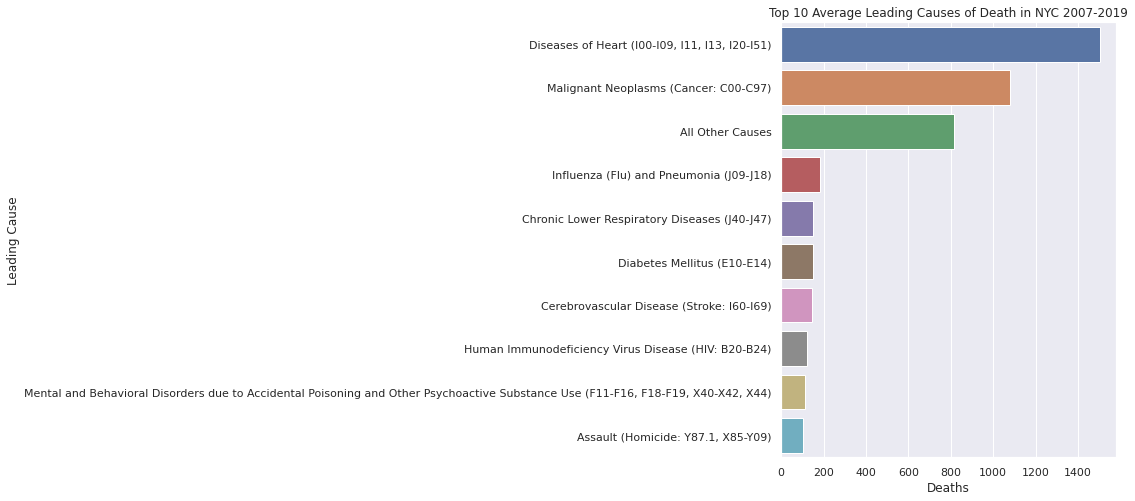

In [ ]:
## fix the death axis 
sns.set(rc={"figure.figsize":(6, 8)})
sns.barplot(y = Avg_Death.index,x = Avg_Death["Deaths"]).set(title = "Top 10 Average Leading Causes of Death in NYC 2007-2019")

In [ ]:
Avg_Death1 = df.groupby("Leading Cause").agg({"Deaths":"sum"})
Avg_Death1.reset_index()
Avg_Death1 = Avg_Death.sort_values(["Deaths"],ascending = False)
Avg_Death1 = Avg_Death.head(10)
Avg_Death1

,Deaths
Leading Cause,
"Diseases of Heart (I00-I09, I11, I13, I20-I51)",1503.381818
Malignant Neoplasms (Cancer: C00-C97),1080.136364
All Other Causes,814.627273
Influenza (Flu) and Pneumonia (J09-J18),184.563636
Chronic Lower Respiratory Diseases (J40-J47),150.270000
Diabetes Mellitus (E10-E14),148.000000
Cerebrovascular Disease (Stroke: I60-I69),143.864078
Human Immunodeficiency Virus Disease (HIV: B20-B24),123.568182
"Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)",113.803922


[Text(0.5, 1.0, 'Top 10 Leading Causes of Death in NYC 2007-2019')]

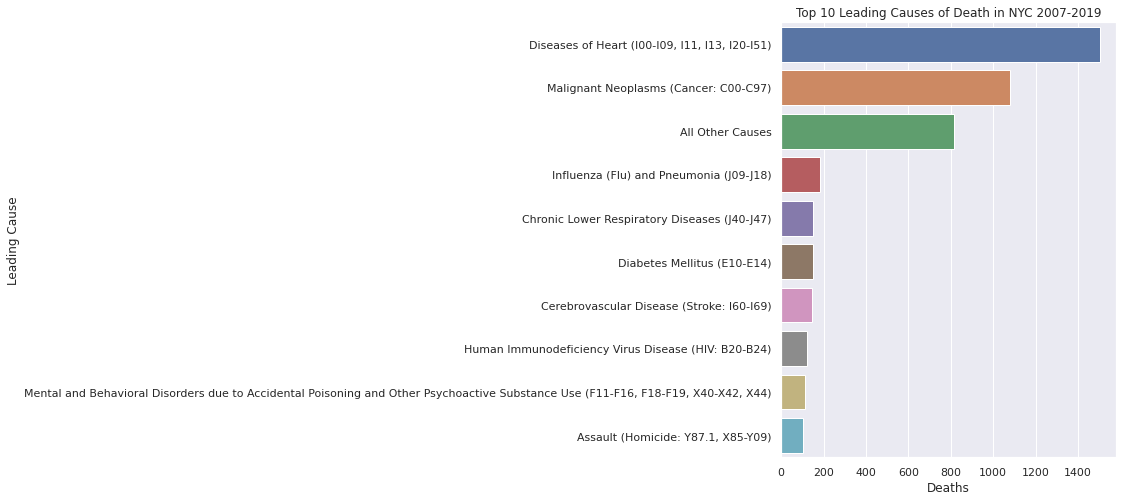

In [ ]:
sns.set(rc={"figure.figsize":(6, 8)})
sns.barplot(y = Avg_Death1.index,x = Avg_Death1["Deaths"]).set(title = "Top 10 Leading Causes of Death in NYC 2007-2019")

### Average Death of People grouped by year

In [ ]:
## Per year what is the average death of people.. 

Year = df.groupby("Year").agg({"Deaths":"mean"})
Year.reset_index()


,Year,Deaths
0,2007,382.950355
1,2008,398.073529
2,2009,391.259259
3,2010,380.471014
4,2011,373.943262
5,2012,391.194030
6,2013,401.406015
7,2014,389.750000
8,2019,306.511236


[Text(0.5, 1.0, 'Average Deaths Per Year')]

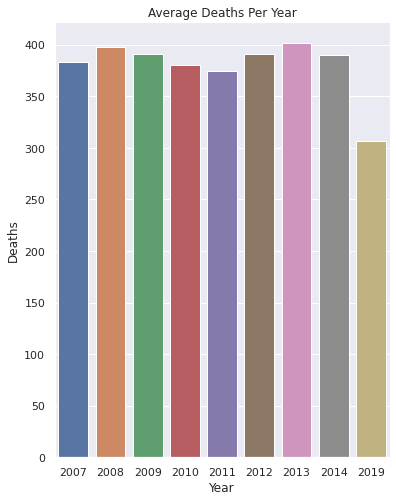

In [ ]:
sns.barplot(x=Year.index,y= Year["Deaths"]).set(title = "Average Deaths Per Year")


### Average Death of People grouped by race

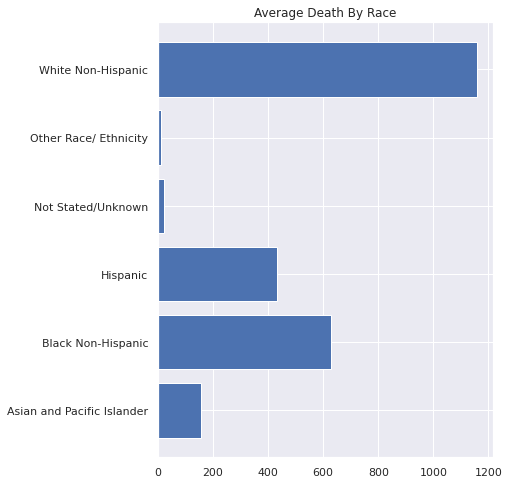

In [ ]:
Race = df.groupby("Race Ethnicity").agg({"Deaths":"mean","Death Rate":"mean"})
Race = Race.reset_index()  ## selected the deaths columns values!
plt.barh(Race["Race Ethnicity"],Race["Deaths"])
plt.title("Average Death By Race")
plt.show()


### Average Death of people grouped by sex and race/ethincity

In [ ]:
sns.set(rc={"figure.figsize":(8,8)})
Gen_Sick = df.groupby(["Sex","Race Ethnicity"]).agg({"Deaths":"mean"})
Gen_Sick = Gen_Sick.reset_index()


Gen_Sick

,Sex,Race Ethnicity,Deaths
0,F,Asian and Pacific Islander,140.282828
1,F,Black Non-Hispanic,664.710000
2,F,Hispanic,413.240000
3,F,Not Stated/Unknown,17.161017
4,F,Other Race/ Ethnicity,9.640625
5,F,White Non-Hispanic,1202.171717
6,M,Asian and Pacific Islander,170.650000
7,M,Black Non-Hispanic,593.580000
8,M,Hispanic,451.898990
9,M,Not Stated/Unknown,27.885714


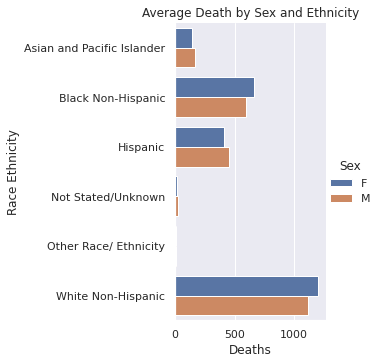

In [ ]:
sns.set(rc={"figure.figsize":(8,8)})
sns.catplot(y="Race Ethnicity",x = "Deaths", hue = "Sex", kind = "bar",data=Gen_Sick).set(title = "Average Death by Sex and Ethnicity")

### Average Death Rate and Age Adjusted Death Rate grouped by Year and Race Ethnicity

In [ ]:
Yea = df.groupby(['Year','Race Ethnicity']).agg({'Death Rate':'mean','Age Adjusted Death Rate':'mean'}).reset_index()
Yea.head()

,Year,Race Ethnicity,Death Rate,Age Adjusted Death Rate
0,2007,Asian and Pacific Islander,26.268182,35.840909
1,2007,Black Non-Hispanic,62.712500,70.225000
2,2007,Hispanic,35.468182,53.068182
3,2007,Not Stated/Unknown,0.000000,0.000000
4,2007,Other Race/ Ethnicity,0.000000,0.000000


In [ ]:
## used to remove the not stated unknown from the graph 
Yea2 = Yea[Yea["Race Ethnicity"] != "Not Stated/Unknown"]

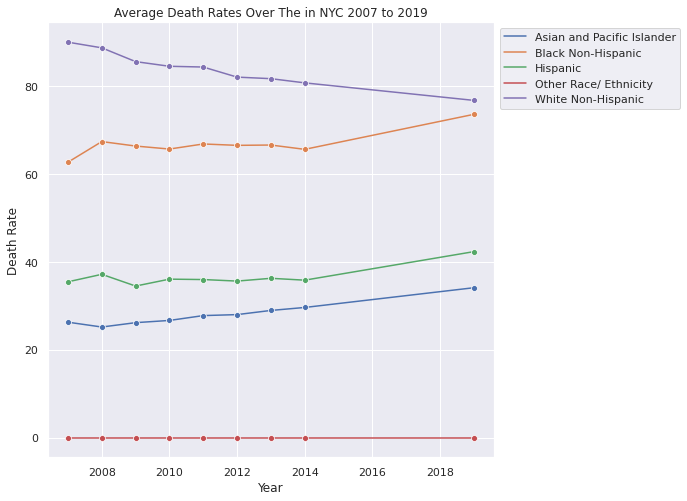

In [ ]:
## We can use a time-seires.. for Yea
## Since people of different community has different age distribution it "appears" that black folks and white folks have the same mortality rate.. 
sns.set(rc={"figure.figsize":(8,8)})
sns.lineplot(x = 'Year', y ='Death Rate',hue ='Race Ethnicity',marker='o',data=Yea2).set(title = "Average Death Rates Over The in NYC 2007 to 2019")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5)

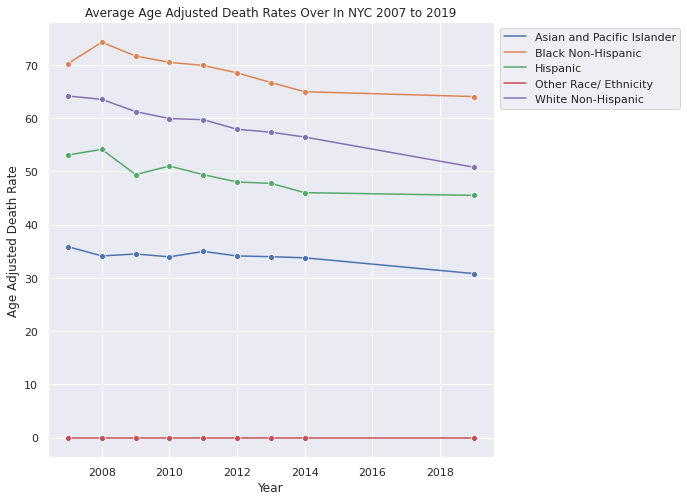

In [ ]:
## Age adjusting rates is a way to make fairer comparisons between groups with different age distributions,Age-adjustment is a statistical way to remove confounding caused by age.
## Rates that are based on the same age distribution can be compared to each other without the presence of confounding by age. i.e age is heavily influencing the death rates making it seems like more white folks are dying more than black folks. 
## Source: https://www.health.ny.gov/diseases/chronic/ageadj.htm
## Black people on average have a higher mortality rate than other races.. 
sns.set(rc={"figure.figsize":(8,8)})
sns.lineplot(x = 'Year', y = 'Age Adjusted Death Rate',hue ='Race Ethnicity',marker='o',data=Yea2).set(title = "Average Age Adjusted Death Rates Over In NYC 2007 to 2019")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5)

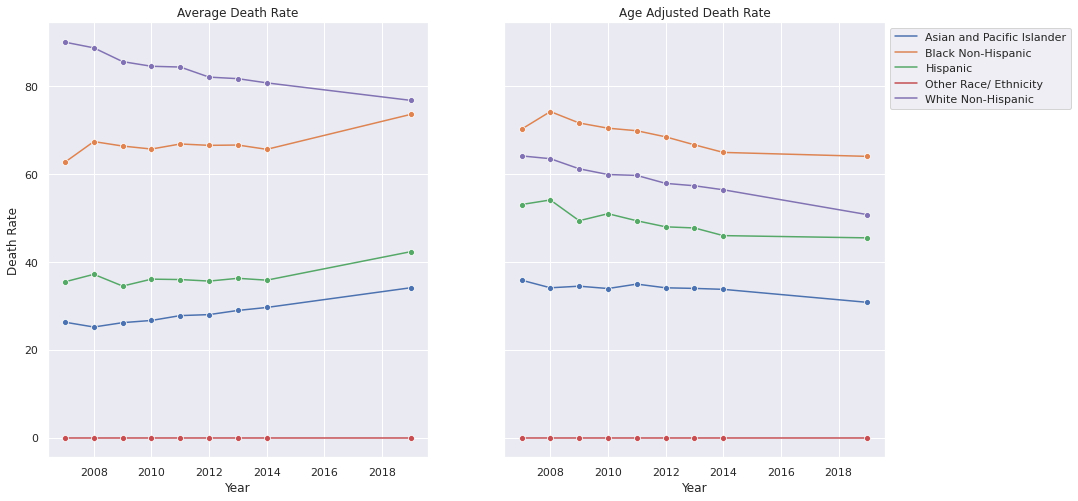

In [ ]:
## Black people on average have a higher mortality rate than other races.. 
fig, ax =plt.subplots(1,2, sharey=True)
sns.set(rc={"figure.figsize":(8,8)})
sns.lineplot(x = 'Year', y ='Death Rate',hue ='Race Ethnicity',marker='o',data=Yea2,ax=ax[0]).set(title = "Average Death Rate")
sns.lineplot(x = 'Year', y ='Age Adjusted Death Rate',hue ='Race Ethnicity',marker='o',data=Yea2,ax=ax[1]).set(title = "Age Adjusted Death Rate")
ax[0].legend_ = None
ax[1].legend(bbox_to_anchor=(1, 1), loc=2)
fig.show()

### Average Age Adjusted Death Rate by race and sex

[Text(0.5, 1.0, 'Average Mortality Rate By Race and Sex')]

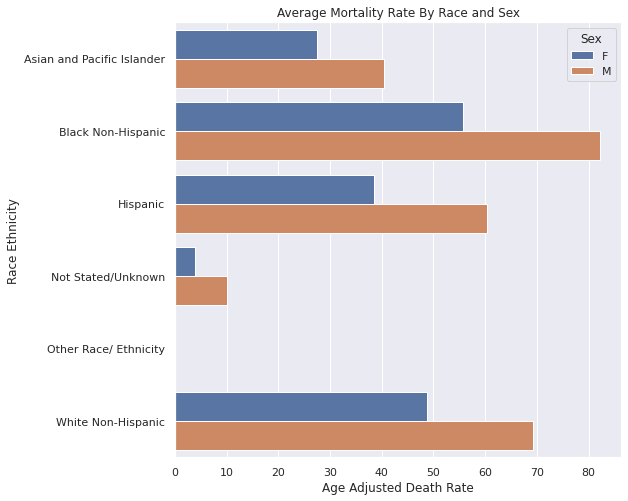

In [ ]:
## Was curious how the age adjusted death rate would affect between race and sex.. 
sns.set(rc={"figure.figsize":(8,8)})
Gen_Sick2 = df.groupby(["Sex","Race Ethnicity"]).agg({"Age Adjusted Death Rate":"mean"})
Gen_Sick2 = Gen_Sick2.reset_index()
sns.barplot(x= "Age Adjusted Death Rate",y= "Race Ethnicity",hue = "Sex",data = Gen_Sick2).set(title ="Average Mortality Rate By Race and Sex")

# Conclusion: In conclusion, the main takeway from the dataset we have that is
- Leading Cause of Death for New York City residents was Heart Disease
- The highest average death was in 2013
- White Non-Hispanic group had the highest average death than other ethnicities
- White Non-Hispanic Females and Black Non-Hispanic Females had higher death averages than their males counterparts
- Biological Males on average have a higher death rate than biological females across all races with Black Males have the highest mortality rate

# Mistakes/pitfalls that may have occured 
- The death rate was cofounded by age making it seem that the black and white death rate was the same even though it was not
- The dataset was really small about 1272 observations so it may not provide the whole context of what actually happened
- A lot of empty values from anon users.. which doesn't give us an accurate description for the death rate for that opted out
- There was no data for the year between 2015 to 2019 



# Interpreting the Analysis

With this analysis we should focus on policies on helping the black community and older folks in getting easier acess to vitial medical resources. We also place more funding and research on the underlying cause of heart disease and cancer to help reduce the leading cause of it. 